# A.) Predicting heart disease using machine learning 
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

This notebook is organized into three main parts:

> *A.)* *"Predicting Heart Disease with Machine Learning":* In this section, I walk through the six steps I followed to create this project, sharing interesting thoughts and insights along the way. You can explore each step in detail or jump directly to Section 5.2 to see the model evaluation, including the classification matrix and other metrics.

> *B.)* *"Insights and Analysis":* Here, alongside Section 5.2, you’ll find some additional insights on model performance and ways to interpret and apply the model's results.

> *C.)* *"Saving and Loading the Model":* This final part covers how to save and reload the model, making it convenient for further research or use.

Note: This notebook is for learning purposes as I continue to refine my skills.

Let’s dive into Part A!

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

   <img src="images/tools.png" alt="tools Image">



<a id="problem-definition"></a>

## 1. Problem Definition
In a statement,

  > Given clinical parameters about a patient, can we predict whether or not they have heart disease?

<a id="problem-definition"></a>


## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
> If we can reach 87% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features - what my data set is :
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Data dictonary below**

### data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* * can range from mild symptoms to severe problems
* * signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
!pip install seaborn


In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization library

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn for machine learning
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for binary classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors model for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest model, an ensemble method for classification

# Model Evaluation tools from Scikit-Learn
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.model_selection import cross_val_score  # Performs cross-validation to evaluate model performance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Hyperparameter tuning methods
# RandomizedSearchCV - Random search over a parameter grid
# GridSearchCV - Exhaustive search over a parameter grid

# Model Evaluation metrics from Scikit-Learn
from sklearn.metrics import confusion_matrix  # Creates a confusion matrix to evaluate classification
from sklearn.metrics import classification_report  # Provides a summary of precision, recall, f1-score, and support
from sklearn.metrics import precision_score, recall_score, f1_score  # Metrics to evaluate model's performance
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+  # Plots ROC curve for binary classification model

### Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 4.1 Data Exploration (exploratory data analysis or EDA)
**The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.**

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

### Basic Exploring:

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Let's find out how many of each class there:**

In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

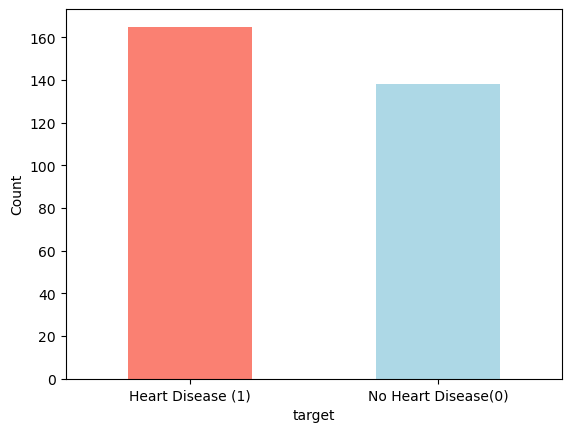

In [6]:
# Lets see it in a plt :
ax = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
ax.set_xticklabels(["Heart Disease (1)", "No Heart Disease(0)"], rotation=0)  # Custom labels and no rotation
ax.set_ylabel("Count")
plt.show()


In [7]:
# info.. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**# Are there any missing values?**

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# just another discribe of the data we will use ..
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### finding patterns: (1,2,3) acorrding the slide video

#### 1.) Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


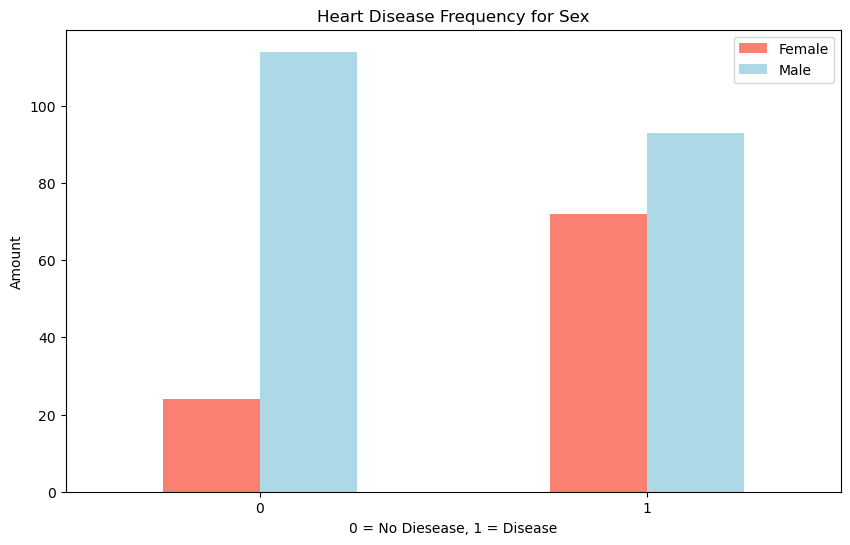

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);
plt.show()

#### 2.) Age vs. Max Heart Rate for Heart Disease

In [13]:
# thalach is maximum haert rate
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

**We see that Length is 91, witch mean that we have a 91 rows. not like man and women that have only 2 rows . so we will need scatter plot..**

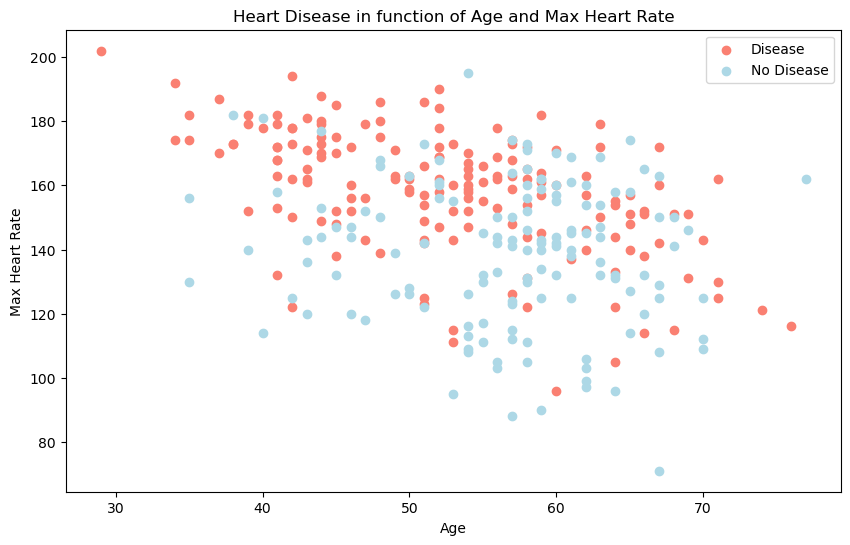

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1], # age that positive
            df.thalach[df.target==1], # max heart that positive
            c="salmon") # color (light red)

# Scatter with negative examples
plt.scatter(df.age[df.target==0], # age that negetive
            df.thalach[df.target==0], # max heart that negetive
            c="lightblue") # color

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]); # the squre in the right corner
plt.show()

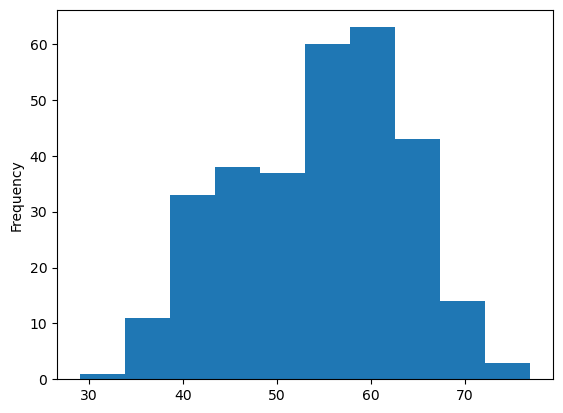

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();
plt.show()

#### 2.) Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

only 4 rows , lets see it in a simple way :

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


and in a plot way : 

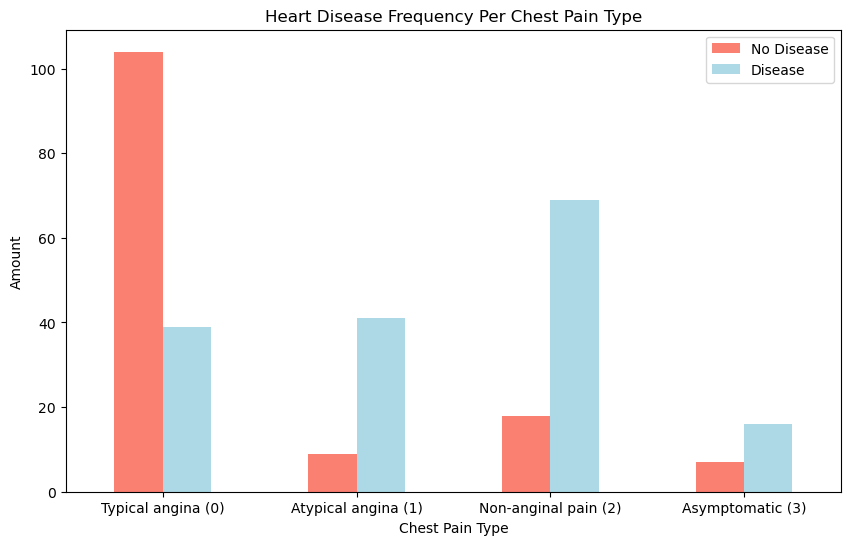

In [18]:
# Make the crosstab more visual
ax = pd.crosstab(df.cp, df.target).plot(kind="bar",
                                        figsize=(10, 6),
                                        color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
ax.set_xticklabels(["Typical angina (0)", "Atypical angina (1)", "Non-anginal pain (2)", "Asymptomatic (3)"], rotation=0)  # Custom labels for X axis and no rotation
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.show()


#### 3.) Make a correlation matrix comapre between all the columns and see ration between a col and target

In [19]:
df.corr() # comapre between all the columns:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


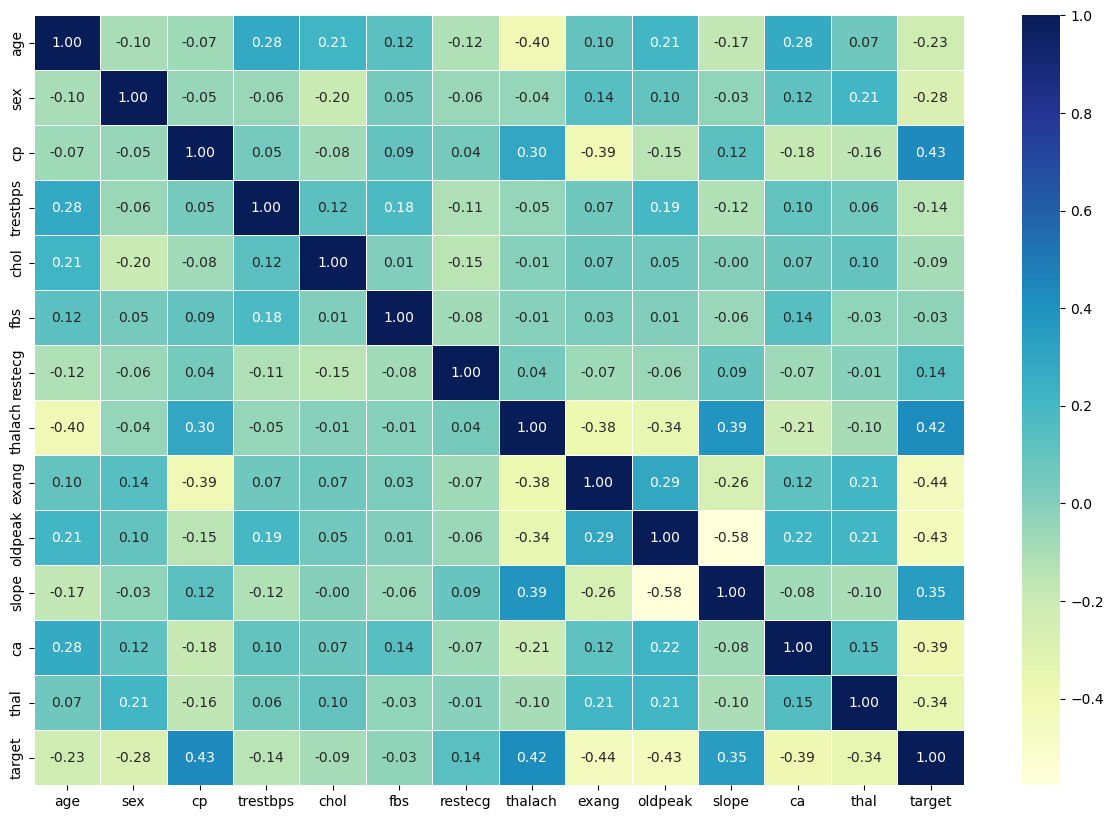

In [20]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.show()

## 5. Modelling : (166)

### Prepering our data for ML model:

In [21]:
# Split data into X and y
X = df.drop("target", axis=1) # evrithing but target col

y = df["target"] # only target col

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2) # train=80% , test=20%.

### Chossing the right Model

Now we've got our data split into training and test sets, it's time to build a machine learning model.

sklearn map : https://scikit-learn.org/stable/machine_learning_map.html

 We'll train it (find the patterns) on the training set.

 And we'll test it (use the patterns) on the test set.

 We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

**Lets create a function that will run on every model with out reapiting our self each time with each model:**

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): # the func:
    
    """ What that func does:
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels

    Returns:
    model_scores (a dictonary)
        A dictionary containing each model’s name and its score on the test set.
    
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {} # currently empty
    
    # Loop through each model in the models dictionary
    for name, model in models.items():
        # Fit (train) the model on the training data
        model.fit(X_train, y_train)
        # Score (evaluate) the model on the test data and store the result
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

### Experimenting with our ML Models:

In [26]:
model_scores_results = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores_results # this is the variable that held the return from fit_and_score() witch is a dictonary

C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Model Comparison:**

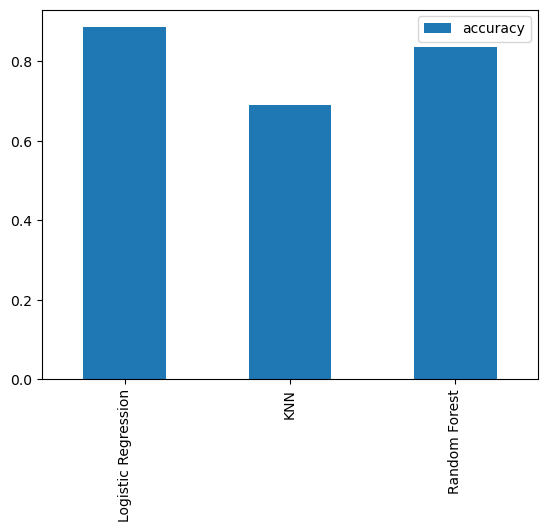

In [27]:
model_compare = pd.DataFrame(model_scores_results, index=["accuracy"]) # by using index=["accuracy"], you are specifying that these scores represent "accuracy" values for each model.
model_compare.T.plot.bar(); # the .T transposes the DataFrame, making model names appear on the x-axis with their respective accuracy values on the y-axis.
plt.show()

## 5.1 Improving our models: (169)

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

 **first tow are almos in every ML model:**
* Hypyterparameter tuning
* Feature importance

  **these are specific to classifiction:**
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand) on *KNN* (169)
**not very efficent to chke knn beacuse he was bad allready,
and speceily chake by hand is not the best option ... just for the study ...**

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


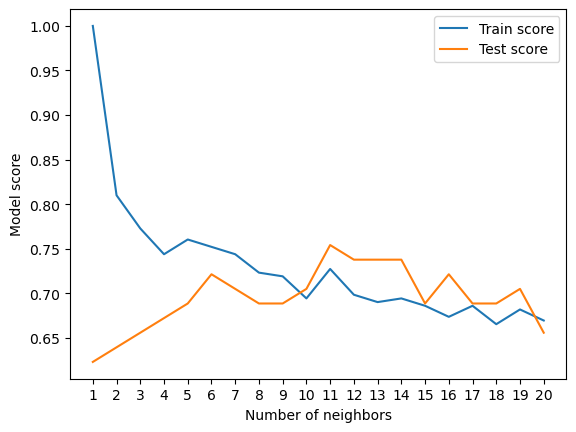

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
plt.show()

### Hyperparameter tuning with RandomizedSearchCV (170)
**We're going to tune:**
 

* LogisticRegression()
* RandomForestClassifier()

By using ... using RandomizedSearchCV

In [32]:
# This is from the doc , the parameter that importent to improve : 

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), # Regularization strength
                "solver": ["liblinear"]}     # Algorithm for optimization


'''
C: This is the regularization parameter. Higher values of C mean less regularization, while lower values mean more regularization. 
Using np.logspace(-4, 4, 20) generates 20 values on a logarithmic scale
'''

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),  # Number of trees
    "max_depth": [None, 3, 5, 10],            # Maximum depth of trees
    "min_samples_split": np.arange(2, 20, 2), # Min samples to split a node
    "min_samples_leaf": np.arange(1, 20, 2)   # Min samples for a leaf node
}


'''
n_estimators: Specifies the number of trees in the forest. Here, values range from 10 to 1000 in increments of 50. More trees usually improve performance up to a certain point, though they also increase computation time.

max_depth: Controls the maximum depth of each tree. Limiting depth helps prevent overfitting. None means nodes are expanded until they have the minimum samples required. The values [None, 3, 5, 10] allow RandomizedSearchCV to explore both unrestricted depth (None) and restricted depths.

min_samples_split: Minimum number of samples needed to split a node. Lower values can lead to overfitting, while higher values make the model more generalized. np.arange(2, 20, 2) allows values between 2 and 20 in steps of 2.

min_samples_leaf: Minimum number of samples required for a leaf node. Like min_samples_split, this helps control overfitting. np.arange(1, 20, 2) specifies values between 1 and 20 in steps of 2.
'''


'\nn_estimators: Specifies the number of trees in the forest. Here, values range from 10 to 1000 in increments of 50. More trees usually improve performance up to a certain point, though they also increase computation time.\n\nmax_depth: Controls the maximum depth of each tree. Limiting depth helps prevent overfitting. None means nodes are expanded until they have the minimum samples required. The values [None, 3, 5, 10] allow RandomizedSearchCV to explore both unrestricted depth (None) and restricted depths.\n\nmin_samples_split: Minimum number of samples needed to split a node. Lower values can lead to overfitting, while higher values make the model more generalized. np.arange(2, 20, 2) allows values between 2 and 20 in steps of 2.\n\nmin_samples_leaf: Minimum number of samples required for a leaf node. Like min_samples_split, this helps control overfitting. np.arange(1, 20, 2) specifies values between 1 and 20 in steps of 2.\n'

**Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...** (171)

*Tune LogisticRegression:*

In [33]:
# 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression     ..... what that inside of RandomizedSearchCV , is our grid and other difualt stuff that we need !
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

We can see above what he chosen randomly to be the best hyper paramters witch is : LogisticRegression(C=0.23357214690901212, solver='liblinear').

In [34]:
rs_log_reg.score(X_test, y_test) # Now we will see the new score ...

0.8852459016393442

Witch is exactly the same .... so we need to change things ...

**let's do the same for RandomForestClassifier()...**

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

Also in here we can see above the best hyper parameters he chosse 

In [36]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

Here we can see improvment but still ,  `LogisticRegression` was better so we keep going with him

### Hyperparamter Tuning with GridSearchCV (172)
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

**GrisSearchCv cchake all possible solution and not randomize iter like RandomizedSearchCv ...** 

In [37]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## 5.2 ***Evaluting*** our tuned machine learning classifier, beyond accuracy 
****with our best model yet : *`LogisticRegression`*****

* ROC curve and AUC score
* **Confusion matrix**
* **Classification report:**
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

* **Feature Importance**

To make comparisons and evaluate our trained model, first we need to make predictions.

In [39]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

`y_preds` contains the predicted labels for the test dataset `(X_test)` using the tuned model, gs_log_reg.

These predictions `(y_preds)` will later be compared to the true labels `(y_test)` to evaluate how well the model is performing on unseen data.

In [40]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

###  ROC curve need to understand better

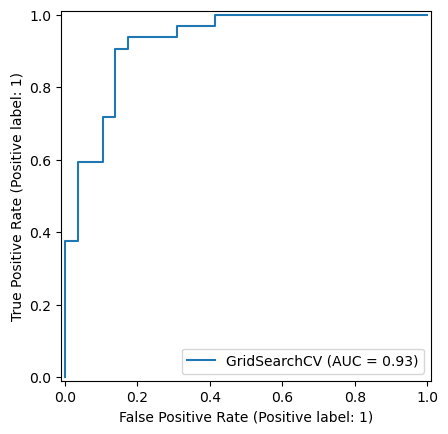

In [42]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()


###  Confusion matrix (175)

In [43]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


<img src="images/confusion-matrix.png" alt="con-matrix">

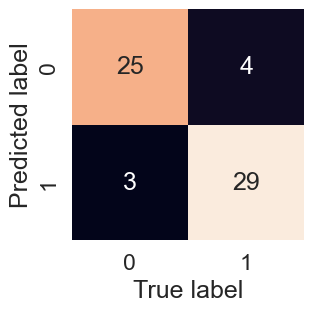

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
    
plot_conf_mat(y_test, y_preds)
plt.show()

### Classification report (Evaluation Metrics)

#### On regular test&split: (without cross validation):
with explantion:

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



***Explenation:***

**`Precision`**: Precision measures the accuracy of positive predictions. It tells you, out of all instances predicted as a certain class (0 or 1 here), how many were actually correct. `High precision means a low false positive rate` (in the confusion matrix).

**`Recall`**: It tells you, out of all the actual instances of a class, how many were correctly predicted. `High recall means a low false negative rate.`

**`F1-score:`** The F1-score is the harmonic mean of precision and recall. It provides a balance between the two

**`Support`**: Support represents the actual number of occurrences of each class in the y_test dataset. It indicates how many instances of each class were used to calculate the precision, recall, and F1-score for that class.

**`Accuracy`**: The overall accuracy of the model, which represents the percentage of correct predictions out of all predictions.(the defualt of using score()).

**`Macro avg`**: This is the average of precision, recall, and F1-score for both classes (0 and 1), calculated without considering class imbalance. It is a simple average.

**`Weighted avg`**: This is the average of precision, recall, and F1-score for both classes, weighted by the support (number of instances) for each class.

In [46]:
# The same but More visualy way .. :

# Step 1: Get the classification report as a dictionary
report_dict = classification_report(y_test, y_preds, output_dict=True)

# Step 2: Convert it to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("\nClassification Report for Loaded Model:")
display(report_df)  # This will show the DataFrame in Jupyter Notebook




Classification Report for Loaded Model:


,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000


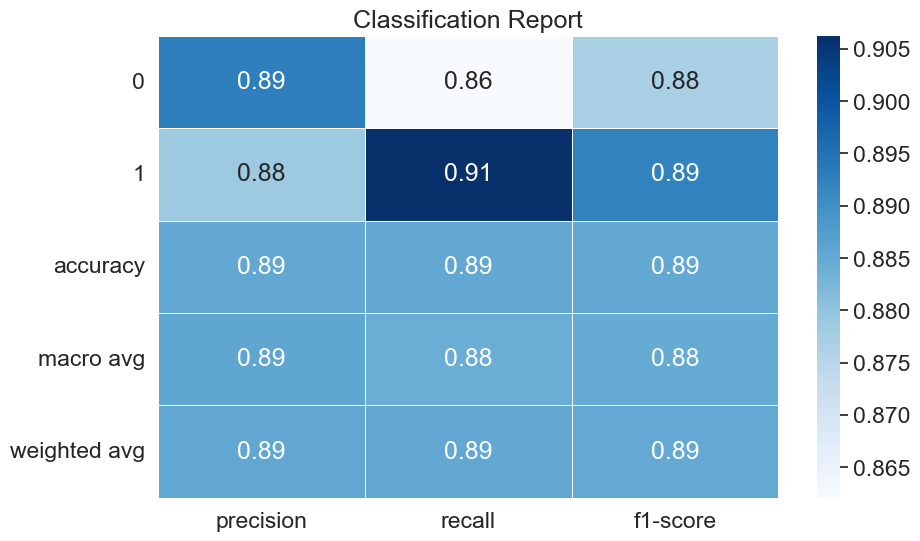

In [47]:
# Generate classification report as dictionary
report = classification_report(y_test, y_preds, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude the 'accuracy' row if not needed

# Plot heatmap with appropriate settings
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Classification Report")
plt.show()

### Evaluation metrics using **cross-validation**:
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using 

`cross_val_score().`

>extend and improve the Classifiction Report

In [48]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [50]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [53]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [54]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

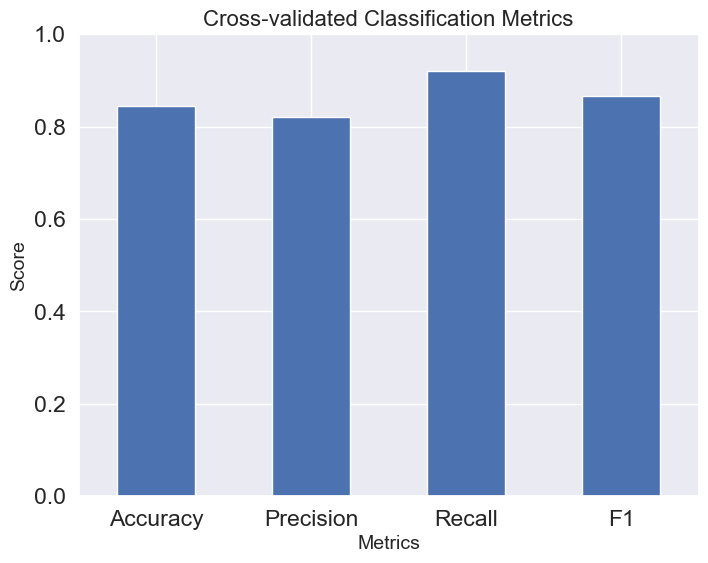

In [55]:
# Create DataFrame with metrics
cv_metrics = pd.DataFrame({
    "Accuracy": [cv_acc],
    "Precision": [cv_precision],
    "Recall": [cv_recall],
    "F1": [cv_f1]
})

# Transpose and plot for better readability
cv_metrics = cv_metrics.T  # Transpose so metrics are on the y-axis
cv_metrics.columns = ["Score"]  # Rename the single column for clarity
cv_metrics.plot(kind="bar", legend=False, figsize=(8, 6))

# Add title and labels
plt.title("Cross-validated Classification Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metrics", fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Assuming metrics are on a 0-1 scale for readability
plt.show()


### Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?" (like correltion metrix)

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [56]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [57]:
# Check coef_ : this is how we can chake *Feature Importance*
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

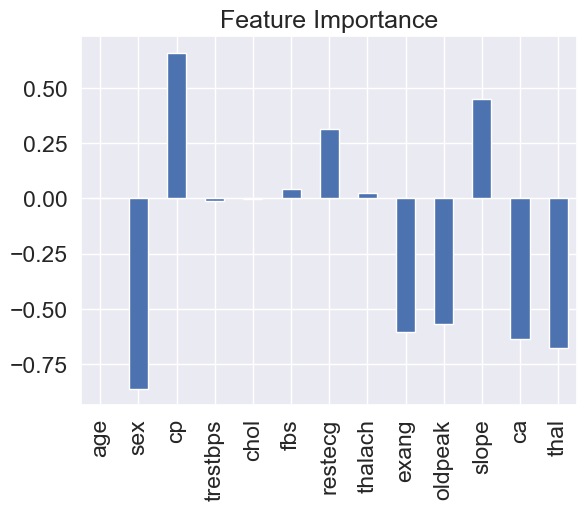

In [60]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show()

**What is realy high or realy low is more contribute to the reaserch**

for example :

*Influential Negetive Example*:

In [61]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


For example we can see that as sex  going down (0) witch mean women  the ratio between women(0) and heart disease is realy increasing witch mean that women are prone more to heart disease .

*Influential Positive Example*:

In [62]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


For example we can see that as slope os going up the ratio between slope num(2) and  heart disease is realy increasing witch mean that num(2) of slope are prone more to heart disease .

**Low or Near-Zero Importance**:

chol (Cholesterol) and fbs (Fasting Blood Sugar) have near-zero importance. This suggests that these features don’t provide much predictive power for the model in this dataset and are likely not as relevant.

**Summary:**
* Most Influential Positive Predictors: `cp`, `slope`, and `restecg`.
* Most Influential Negative Predictors: `sex`, `thal`, `ca`, and `exang`.
* Minimal Influence: `age`, `trestbps`, and `chol`.

## 6. Experimentation
ask yourself:

* Could I collect more data?
* Could I try a better model? Like CatBoost or XGBoost?
* Could I improve the current models? (beyond what we've done so far)
* If my model is good enough (hit your evaluation metric allready) how would you export it and share it with others?

  .........................................................................................................................


`Results`:
*After experimenting with CatBoost and XGBoost, the initial Logistic Regression model achieved the highest cross-validated accuracy of approximately 0.88, proving to be the best-performing model for our heart disease project. This demonstrates that a simple, well-tuned model can sometimes outperform more complex alternatives*.

### Try to improve current model, `LogisticRegression`:

In [63]:
# Define a broader hyperparameter grid
log_reg_grid = {
    "C": np.logspace(-6, 6, 50),  # Wider range for regularization
    "solver": ["liblinear", "lbfgs", "saga"]  # Testing different solvers
}

# Initialize GridSearchCV with a wider range
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,  # 5-fold cross-validation
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

# Evaluate the model on the test set
log_reg_best_score = gs_log_reg.score(X_test, y_test)
log_reg_best_score


Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was

0.8852459016393442

### Trying Advanced Models - CatBoost and XGBoost

In [64]:
pip install catboost xgboost


Note: you may need to restart the kernel to use updated packages.


In [65]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize CatBoost and XGBoost models with default parameters
cat_model = CatBoostClassifier(verbose=0)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Evaluate CatBoost
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring="accuracy")
print("CatBoost CV Accuracy:", cat_scores.mean())

# Evaluate XGBoost
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="accuracy")
print("XGBoost CV Accuracy:", xgb_scores.mean())


CatBoost CV Accuracy: 0.8055272108843538


C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label

XGBoost CV Accuracy: 0.8055272108843538


C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### the initial  `LogisticRegression` model achieved the highest accuracy,

#### Logistic Regression with GridSerachCv (again)

*After experimenting with CatBoost and XGBoost, the initial Logistic Regression model achieved the highest cross-validated accuracy of approximately 0.88, proving to be the best-performing model for our heart disease project. This demonstrates that a simple, well-tuned model can sometimes outperform more complex alternatives.*

In [66]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

#### Simple way also work:

In [67]:
# 1.) Split data into train and test sets
np.random.seed(42)  # Ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% train, 20% test split

# 2.) Initialize and train the model
model = LogisticRegression() 
model.fit(X_train, y_train)

# 3.) Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8852


C:\Users\itama\Desktop\ZTM\ML-ZTM\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Go Back to 5.2 to see the visual classifiction report of 'LogisticRegression' 


[Jump to Problem Definition](#problem-definition)


# B.) Define the Prediction Function - Insights and Analysis
>Use the trained `LogisticRegression model` to predict the likelihood of heart disease based on a new set of patient data.

> **`Notice! explore section 5.2 for the initial insights`**

<img src="images/heart-logo.png" alt="heart-logo Image" height="300px" width="300px">


## Find Out About Hypothetical Patient:
>Predict Probability of Heart Disease

>**Random Patient:**

In [68]:
# Define a sample patient with randomized data based on the features in your dataset
sample_patient = {
    "age": np.random.randint(30, 80),  # Random age between 30 and 80
    "sex": np.random.choice([0, 1]),  # Random sex (0 = female, 1 = male)
    "cp": np.random.choice([0, 1, 2, 3]),  # Random chest pain type
    "trestbps": np.random.randint(90, 200),  # Random resting blood pressure
    "chol": np.random.randint(150, 300),  # Random cholesterol level
    "fbs": np.random.choice([0, 1]),  # Random fasting blood sugar (0 or 1)
    "restecg": np.random.choice([0, 1, 2]),  # Random resting ECG results
    "thalach": np.random.randint(100, 200),  # Random maximum heart rate achieved
    "exang": np.random.choice([0, 1]),  # Random exercise induced angina (0 or 1)
    "oldpeak": np.random.uniform(0, 5),  # Random ST depression (continuous)
    "slope": np.random.choice([0, 1, 2]),  # Random slope of peak exercise ST segment
    "ca": np.random.choice([0, 1, 2, 3]),  # Random number of major vessels (0-3)
    "thal": np.random.choice([1, 3, 6, 7])  # Random thalium stress result
}

# Convert sample patient data to DataFrame format and use the same preprocessing steps as the training data
sample_patient_df = pd.DataFrame([sample_patient])

sample_patient_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56,0,1,110,179,0,2,163,0,0.976215,0,3,6


In [69]:
# Predict using the trained Logistic Regression model
prediction = gs_log_reg.predict(sample_patient_df)

# Create a styled DataFrame for the prediction result
prediction_df = pd.DataFrame({
    "Predicted Outcome": ["Heart Disease" if prediction[0] == 1 else "No Heart Disease"]
})

# Display the prediction in a styled DataFrame
print("\nPrediction Result:")
display(prediction_df.style.set_properties(**{'background-color': '#f5f5f5', 'font-size': '16px'}))



Prediction Result:


,Predicted Outcome
0,No Heart Disease


>**Prone to Heart Disease:**

In [149]:
# Define a sample patient with values that indicate a higher likelihood of heart disease
heartDiseasePatient = {
    "age": 55,               # Older age can increase risk
    "sex": 0,                # Fmale (in the dataset, males are more at risk)
    "cp": 3,                 # Chest pain type 3 (asymptomatic), often associated with heart issues
    "trestbps": 194,         # Higher resting blood pressure
    "chol": 284,             # Higher cholesterol levels
    "fbs": 1,                # High fasting blood sugar
    "restecg": 1,            # ST-T wave abnormality in ECG
    "thalach": 150,          # Lower maximum heart rate achieved
    "exang": 0,              # Exercise-induced angina present
    "oldpeak": 1.5,          # Significant ST depression
    "slope": 2,              # Downsloping, which indicates higher risk
    "ca": 0,                 # Presence of colored vessels
    "thal": 0                # Reversible defect in the thalium stress test
}

# Convert the dictionary to a DataFrame
heartDiseasePatient_df = pd.DataFrame([heartDiseasePatient])

heartDiseasePatient_df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,0,3,194,284,1,1,150,0,1.5,2,0,0


In [150]:
# Predict using the trained Logistic Regression model
prediction = gs_log_reg.predict(heartDiseasePatient_df)

print(f"Predicted likelihood of heart disease (1 = Disease, 0 = No Disease): {prediction[0]}")

# Create a DataFrame for the prediction result with a descriptive message
prediction_df = pd.DataFrame({
    "Patient": ["Random"],
    "Predicted Outcome": ["Heart Disease" if prediction[0] == 1 else "No Heart Disease"]
})

# Display the prediction result as a DataFrame
prediction_df

Predicted likelihood of heart disease (1 = Disease, 0 = No Disease): 1


,Patient,Predicted Outcome
0,Random,Heart Disease


>***Predict Probability of Heart Disease:***

In [151]:
# Get probability of heart disease
disease_probability = gs_log_reg.predict_proba(heartDiseasePatient_df)[0][1]
print(f"Probability of heart disease: {disease_probability:.2f}")

# Create a DataFrame for the probability result
probability_df = pd.DataFrame({
    "Patient": ["Heart Disease Patient"],
    "Probability of Heart Disease": [f"{disease_probability:.2f}"]
})

# Display the probability result as a DataFrame
probability_df


Probability of heart disease: 0.97


,Patient,Probability of Heart Disease
0,Heart Disease Patient,0.97


## Feature Importance:
> Also can view 5.2 Section

**Feature Importance:**

Feature Importance:
 cp          0.660671
slope       0.450516
restecg     0.312758
fbs         0.043861
thalach     0.024594
age         0.003167
chol       -0.001664
trestbps   -0.011570
oldpeak    -0.568628
exang      -0.604131
ca         -0.636099
thal       -0.676634
sex        -0.860446
dtype: float64


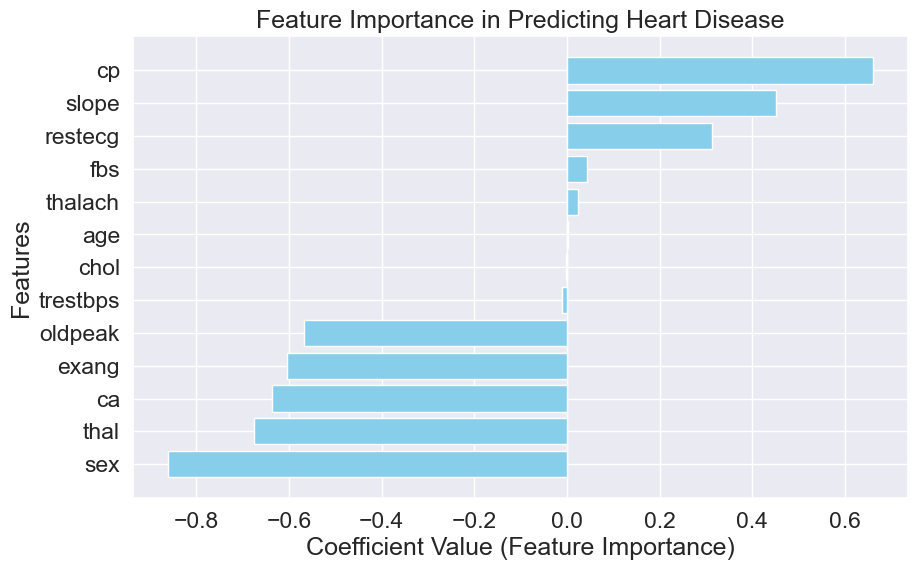

In [101]:
# Get coefficients of features
feature_importance = pd.Series(gs_log_reg.best_estimator_.coef_[0], index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Feature importance from your Logistic Regression model
feature_importance = pd.Series(
    gs_log_reg.best_estimator_.coef_[0], 
    index=X_train.columns
).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values, color='skyblue')
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Heart Disease")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance on top
plt.show()

## Predict on a Range of Hypothetical Patients:
>simulate various scenarios by creating multiple hypothetical patients with different attributes and observing the predictions.
This allows you to see how certain factors (like age or cholesterol levels) impact the risk of heart disease.

In [110]:
# Create a DataFrame of hypothetical patients with varying cholesterol levels
hypothetical_patients = {
    "age": [50, 50, 50],
    "sex": [1, 1, 1],
    "cp": [1, 2, 3],
    "trestbps": [150, 150, 150],
    "chol": [250, 250, 250],  # Varying cholesterol levels
    "fbs": [0, 0, 0],
    "restecg": [1, 1, 1],
    "thalach": [140, 140, 140],
    "exang": [1, 1, 0],
    "oldpeak": [2.0, 2.0,0],
    "slope": [2, 2, 2],
    "ca": [0, 1, 0],
    "thal": [7, 7, 0]
}

# Convert the dictionary to a DataFrame directly
hypothetical_patients_df = pd.DataFrame(hypothetical_patients)

print("Data Frame of patients:")
# Display the DataFrame
hypothetical_patients_df

Data Frame of patients:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,1,150,250,0,1,140,1,2.0,2,0,7
1,50,1,2,150,250,0,1,140,1,2.0,2,1,7
2,50,1,3,150,250,0,1,140,0,0.0,2,0,0


In [113]:
# Remove the "Heart Disease Prediction" column if it exists
if "Heart Disease Prediction" in hypothetical_patients_df.columns:
    hypothetical_patients_df = hypothetical_patients_df.drop(columns=["Heart Disease Prediction"])

# Predict likelihood of heart disease for these patients
predictions = gs_log_reg.predict(hypothetical_patients_df)

# Get the probabilities of heart disease (probability of the positive class)
probabilities = gs_log_reg.predict_proba(hypothetical_patients_df)[:, 1]  # Only the probabilities for heart disease

# Add the predictions and probabilities as new columns to the DataFrame
hypothetical_patients_df["Heart Disease Prediction"] = predictions
hypothetical_patients_df["Probability of Heart Disease"] = probabilities

# Display the updated DataFrame with predictions and probabilities
hypothetical_patients_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease Prediction,Probability of Heart Disease
0,50,1,1,150,250,0,1,140,1,2.0,2,0,7,0,0.018651
1,50,1,2,150,250,0,1,140,1,2.0,2,1,7,0,0.019106
2,50,1,3,150,250,0,1,140,0,0.0,2,0,0,1,0.978879


## Compare Predicted Probabilities vs. Actual Outcomes: (As 1)
> simulate various scenarios by creating multiple hypothetical patients with different attributes and observing the predictions. This allows you to see how certain factors (like age or cholesterol levels) impact the risk of heart disease.

> categorize patients into low, medium, and high-risk groups
 


In [129]:
# Get predicted probabilities for test set
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1 (disease)

# Create a DataFrame comparing actual values and predicted probabilities
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted Probability": y_probs
}).reset_index(drop=True)  # Reset index for cleaner display

# Just place the DataFrame as the last line in the cell
comparison_df.head(40)


,Actual,Predicted Probability
0,0,0.132747
1,0,0.755915
2,1,0.814524
3,0,0.054692
4,1,0.884534
5,1,0.870703
6,1,0.605122
7,0,0.004360
8,0,0.013764
9,1,0.561385


**Risk Group Segmentation:**

In [135]:
# Define risk groups based on probability thresholds
risk_groups = pd.cut(y_probs, bins=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

# Add risk group labels to the comparison DataFrame
comparison_df["Risk Group"] = risk_groups
comparison_df.head(10)


,Actual,Predicted Probability,Risk Group
0,0,0.132747,Low
1,0,0.755915,High
2,1,0.814524,High
3,0,0.054692,Low
4,1,0.884534,High
5,1,0.870703,High
6,1,0.605122,Medium
7,0,0.004360,Low
8,0,0.013764,Low
9,1,0.561385,Medium


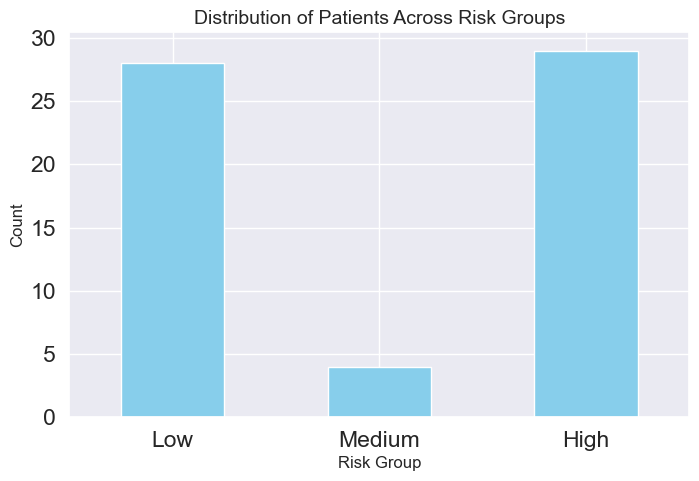

In [136]:
# Plot the count of patients in each risk group
plt.figure(figsize=(8, 5))
comparison_df["Risk Group"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Patients Across Risk Groups", fontsize=14)
plt.xlabel("Risk Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

## SHAP Summary Plot:

* **`SHAP Values < 0:` The feature decreases the model's predicted probability of heart disease.**
* **`SHAP Values > 0:` The feature increases the model's predicted probability of heart disease.**

* `Red: High feature value`
* `Blue: Low feature value`

### Installing shap

In [143]:
!pip install shap

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -- ------------------------------------- 1.6/28.1 MB 8.4 MB/s eta 0:00:04
   ----- ---------------------------------- 3.7/28.1 MB 8.7 MB/s eta 0:00:03
   -------- ------------------------------- 6.0/28.1 MB 9.5 MB/s eta 0:00:03
   ----------- ---------------------------- 8.4/28.1 MB 10.2 MB/s eta 0:00:02
   --------------- ------------------------ 11.0/28.1 MB 10.6 MB/s eta 0:00:02
   -------------------- ------------------- 14.2/28.1 MB 11.4 MB/s eta 0:00:02
   ------------------------ --------------- 17.6/28.1 MB 12.2 MB/s eta 0:00:01
   ------------------------------ --------- 21.5/28.1 MB 13.1 MB/s eta 0:00:01
   ------------------------------------ --- 26.0/28.1 MB 13.9 MB/s eta 0:00:01
   --

### SHAP Feature Importance

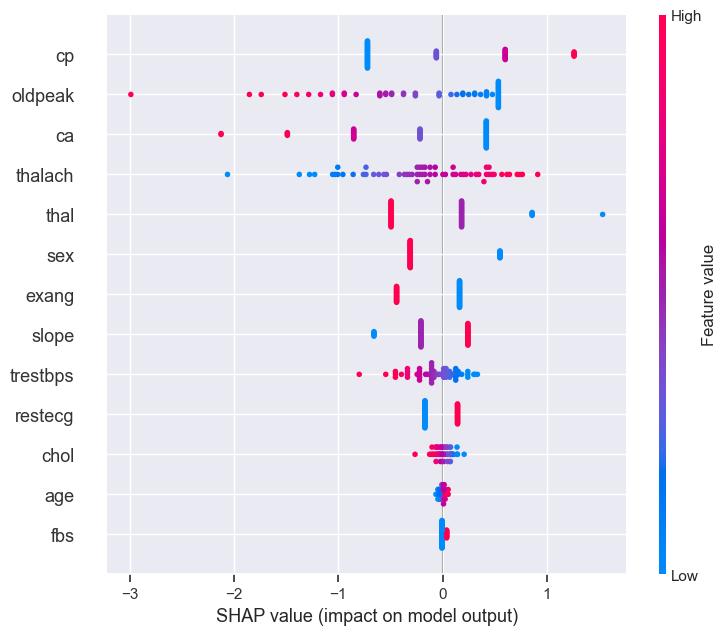

In [145]:
import shap

# Initialize SHAP explainer with your trained model
explainer = shap.Explainer(gs_log_reg.best_estimator_, X_train)
shap_values = explainer(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test)


* **`SHAP Values < 0:` The feature decreases the model's predicted probability of heart disease.**
* **`SHAP Values > 0:` The feature increases the model's predicted probability of heart disease.**

# C.) Saving and loading the heart-disease machine learning model:
 <img src="images/save.png" alt="save Image" height="300px" width="300px" >

In [78]:
from joblib import dump, load

# Save model to file
dump(gs_log_reg, filename="heartDisease_LogisticRegression_GridSerachCv.joblib")

['heartDisease_LogisticRegression_GridSerachCv.joblib']

In [79]:
# Import a saved joblib model
loaded_heartDisease_joblib_model = load(filename="heartDisease_LogisticRegression_GridSerachCv.joblib")

In [80]:
# Use the loaded model to make predictions on the test set
loaded_y_preds = loaded_heartDisease_joblib_model.predict(X_test)

# Calculate evaluation metrics

# Alternatively, you can get a full classification report
print("\nClassification Report for Loaded Model:")
print(classification_report(y_test, loaded_y_preds))



Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [81]:
# Get a classification report as a dictionary and then convert it to a DataFrame
report_dict = classification_report(y_test, loaded_y_preds, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("\nClassification Report for Loaded Model:")
report_df


Classification Report for Loaded Model:


,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000
